### Import libraries

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import glob
import os

#### Download Yolo v3 repo

In [ ]:
# check whether GPU is provided
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
# download and compile darknet_for_colab
!git clone https://github.com/AlexeyAB/darknet
%cd darknet
!make
!chmod +x ./darknet

In [ ]:
# verify installation
! ./darknet

usage: ./darknet <function>


In the file `darknet/Makefile`, update the following settings:



```
GPU=1
CUDNN=1 (optional)
CUDNN_HALF=0
OPENCV=1
AVX=0
OPENMP=0
LIBSO=1 (optional)
```



In [ ]:
# remake the repo
!make

**Note:**  
This step is for yolo training only.

In [ ]:
# download the pretrained weight
!wget https://pjreddie.com/media/files/darknet53.conv.74

### Dataset preparation

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# unzip the dataset and store it to the darknet folder
!unzip '/content/gdrive/Shared drives/zxdrive/APS360 Project/kaggle/face-mask-dataset-yolo-format.zip'

In [ ]:
data_dir = '/content/darknet'
train_path = os.path.join(data_dir, 'dataset/images/train')
val_path = os.path.join(data_dir, 'dataset/images/valid')
test_path = os.path.join(data_dir, 'dataset/images/test')

In [ ]:
# checking 
train_path

'/content/darknet/dataset/images/train'

### Sample dataset

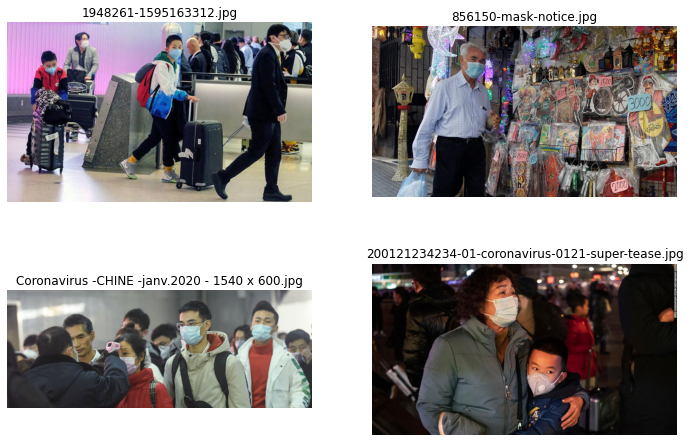

In [ ]:
def read_label(image_path):
  file_name = image_path.replace('.jpg', '.txt')
#   with open(file_name, 'rt') as file:
#     print(os.path.basename(file_name) + ': \n' + file.read())

image_path = glob.glob("{}/*.jpg".format(train_path))
fig = plt.figure(figsize=(12,8))
cols = 2
rows = 2
grid = gridspec.GridSpec(nrows=rows, ncols=cols, figure=fig)
for i in range(cols*rows):
  fig.add_subplot(grid[i])
  image=plt.imread(image_path[i])
  plt.title(os.path.basename(image_path[i]))
  plt.axis(False)
  plt.imshow(image)
  read_label(image_path[i])

In [ ]:
test_image_path[1]

'/content/darknet_for_colab/dataset/images/test/nouveau-virus-en-chine-la-ville-de-wuhan-mise-en-quarantaine-1.jpg'

### Modify Yolo files for the custom dataset (Training only)

1. upload the three files **yolov3_train.cfg**,  **yolov3_test.cfg**, and **yolov4.data** to repo **darknet/cfg**
2. replace the **test.txt**, **train.txt**, and **valid.txt** files in repo **darknet/dataset** with the files in the shared drive

These files are located at:
[SharedDrive](https://drive.google.com/drive/folders/1deEL5yx0nrL64qeYftI4yr0dvMY4l9VN)

### Training

In [ ]:
# check current path
!pwd

/content/darknet


Start training...

In [ ]:
!./darknet detector train cfg/yolov4.data cfg/yolov3_train.cfg darknet53.conv.74 -dont_show -map

#### Testing

In [ ]:
# setting up file path
class_path = '/content/gdrive/Shareddrives/zxdrive/APS360 Project/YOLOv4_weight/custom files/classes.txt'
configure_path = '/content/gdrive/Shareddrives/zxdrive/APS360 Project/YOLOv4_weight/custom files/yolov3_test.cfg'
weight_path = '/content/gdrive/Shared drives/zxdrive/APS360 Project/YOLOv4_weight/yolov3_train_last.weights'
img = '/content/gdrive/Shared drives/zxdrive/APS360 Project/YOLOv4_weight/000_1L24I8.jpg'

In [ ]:
# Importing needed libraries
import numpy as np
import cv2
import time
# testing
yolo3(img)

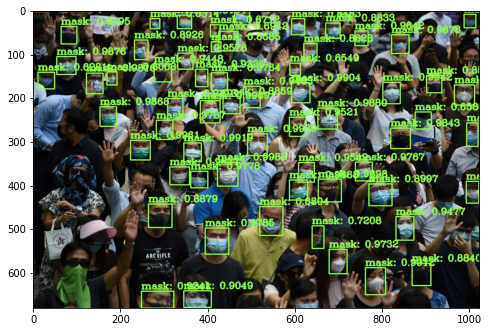

In [ ]:
draw_img('result.jpg')

#### Results


In [119]:
test_path = glob.glob("{}/*.jpg".format('dataset/images/test'))

In [214]:
img = test_path[20]
print(img)

dataset/images/test/oms-declara-emergencia-internacional-por-coronavirus-ap (1).jpg


In [232]:
# testing
bbox_coords = yolo3(img)


Image height=609 and width=1080
Blob shape: (1, 3, 416, 416)
Objects Detection took 1.15021 seconds
nms results: (5, 1)
Object 1: mask
Object 2: mask
Object 3: mask
Object 4: mask
Object 5: mask
bounding boxes: [[784, 155, 57, 59], [434, 136, 90, 108], [75, 144, 45, 43], [948, 139, 48, 53], [785, 156, 56, 59], [258, 165, 49, 49]]
Total objects been detected: 6
Number of objects left after non-maximum suppression: 5


<Figure size 432x288 with 0 Axes>

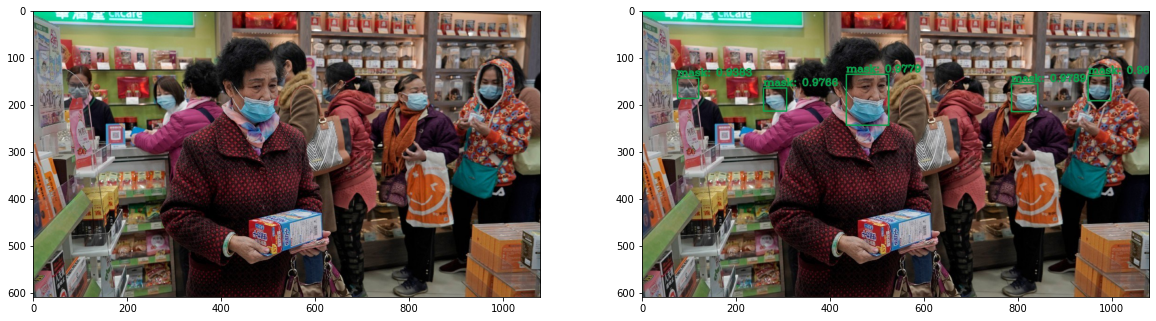

In [233]:
draw_results(img, 'result.jpg')

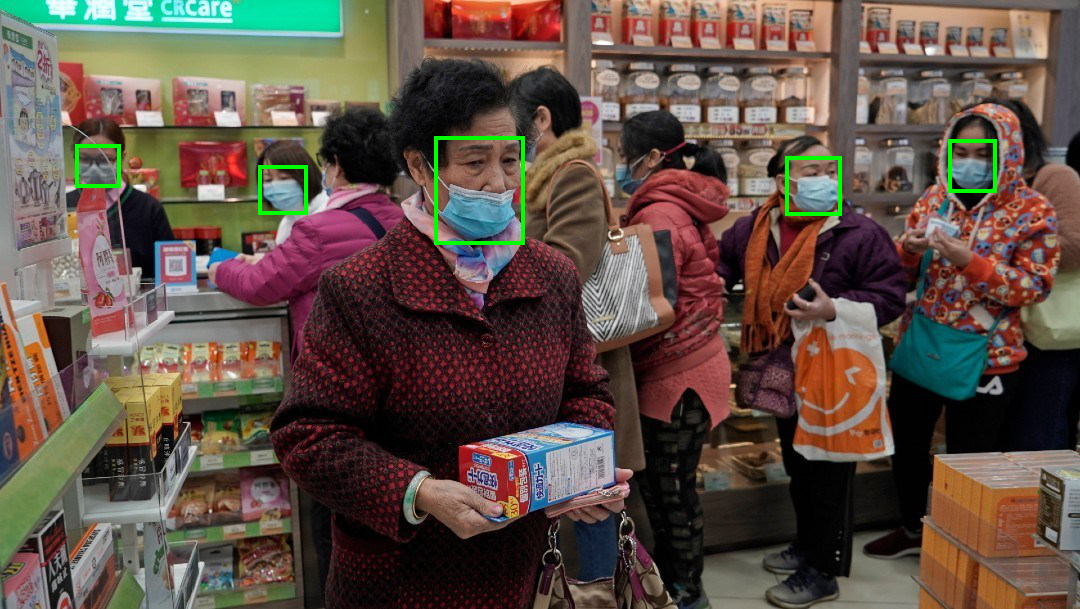

In [234]:
draw_prediction(img, bbox_coords, offset=0)

Adding an offset to the coordinate values

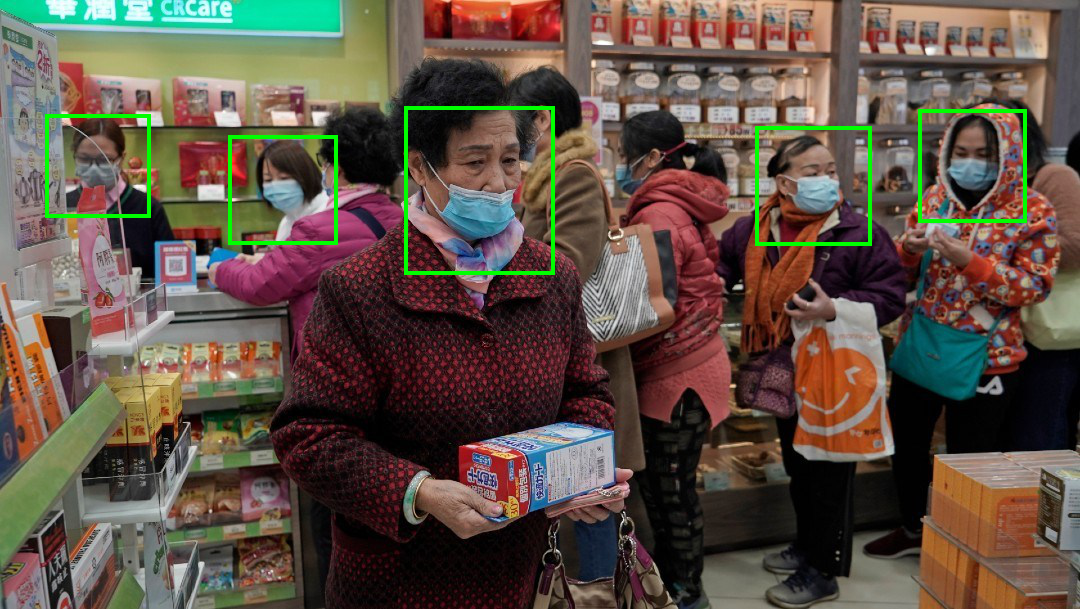

In [235]:
draw_prediction(img, bbox_coords, offset=30)

In [236]:
print(len(bbox_coords))

5


Crops the faces from test image

5


<Figure size 432x288 with 0 Axes>

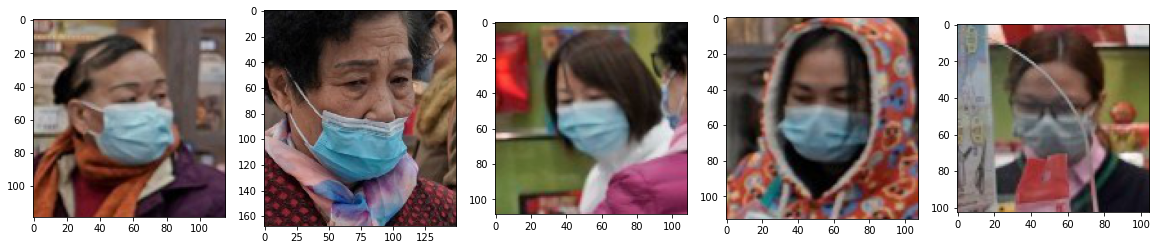

In [237]:
img_list = crop_img(img, bbox_coords, offset=30)
print(len(img_list))
draw_cropped_imgs(img_list)

In [ ]:
# draw imag
def draw_img(img_path):
    image = plt.imread(img_path)
    fig = plt.gcf()
    fig.set_size_inches(8, 10)
    plt.imshow(image)

In [ ]:
# draw imag
def draw_results(original, predicted):
    ori_img = plt.imread(original)
    pred_img = plt.imread(predicted)
    fig = plt.gcf()
    
    f, axarr = plt.subplots(1,2, figsize=(20,20))
    axarr[0].imshow(ori_img)
    axarr[1].imshow(pred_img)

In [168]:
from PIL import Image, ImageDraw, ImageFont
def draw_prediction(img_path, bbox_coords, offset = 0):
    image = Image.open(img_path)
    img = image.copy()
    draw = ImageDraw.Draw(img)
    
    for box in bbox_coords:
        draw.rectangle([box[0]-offset, box[1]-offset, box[0] + box[2]+offset, box[1] + box[3]+offset], outline=(0, 255, 0), width=4)
    return img

In [171]:
def crop_img(img_path, bbox_coords, offset = 0):
    img = plt.imread(img_path)
    img_list = []
    
    for box in bbox_coords:
        xmin = box[0]-offset
        xmax = box[0] + box[2]+offset
        ymin = box[1]-offset
        ymax = box[1] + box[3]+offset
        img_list.append(img[ymin:ymax, xmin:xmax, :])
    return img_list

In [189]:
def draw_cropped_imgs(img_list):
    fig = plt.gcf()
    
    f, axarr = plt.subplots(1,len(img_list), figsize=(20,20))
    
    if len(img_list) == 1:
        axarr.imshow(img_list[0])
    else:
        for i in range(len(img_list)):
            axarr[i].imshow(img_list[i])

In [231]:
# Defining function for processing given image
def yolo3(path):
    # Reading image with OpenCV library
    # In this way image is opened already as numpy array
    # WARNING! OpenCV by default reads images in BGR format
    image_BGR = cv2.imread(path)

    # Check point
    # Showing image shape
    print()
    #print('Image shape:', image_BGR.shape)  # tuple of (466, 700, 3)

    # Getting spatial dimension of input image
    h, w = image_BGR.shape[:2]  # Slicing from tuple only first two elements

    # Check point
    # Showing height an width of image
    print('Image height={0} and width={1}'.format(h, w))  # 466 700

    # Getting blob from input image
    blob = cv2.dnn.blobFromImage(image_BGR, 1 / 255.0, (416, 416),
                                 swapRB=True, crop=False)

    # Check point
    print('Blob shape:', blob.shape)  # (1, 3, 416, 416)


    # Loading face mask class labels from file
    with open(class_path) as f:
        # Getting labels reading every line
        # and putting them into the list
        labels = [line.strip() for line in f]

    # Loading trained YOLO v3 Objects Detector
    # with the help of 'dnn' library from OpenCV
    network = cv2.dnn.readNetFromDarknet(configure_path,
                                         weight_path)

    # Getting list with names of all layers from YOLO v3 network
    layers_names_all = network.getLayerNames()

    # Getting only output layers' names that we need from YOLO v3 algorithm
    layers_names_output = \
        [layers_names_all[i[0] - 1] for i in network.getUnconnectedOutLayers()]

    # Setting minimum probability to eliminate weak predictions
    probability_minimum = 0.5

    # Setting threshold for filtering weak bounding boxes
    # with non-maximum suppression
    threshold = 0.3

    # Generating colours for representing every detected object
    colours = np.random.randint(0, 255, size=(len(labels), 3), dtype='uint8')

    # Implementing forward pass with our blob and only through output layers
    # Calculating at the same time, needed time for forward pass
    network.setInput(blob)  # setting blob as input to the network
    start = time.time()
    output_from_network = network.forward(layers_names_output)
    end = time.time()

    # Showing spent time for forward pass
    print('Objects Detection took {:.5f} seconds'.format(end - start))

    # Preparing lists for detected bounding boxes,
    # obtained confidences and class's number
    bounding_boxes = []
    confidences = []
    class_numbers = []

    # Going through all output layers after feed forward pass
    for result in output_from_network:
        # Going through all detections from current output layer
        for detected_objects in result:
            # Getting 2 classes' probabilities for current detected object
            scores = detected_objects[5:]
            # Getting index of the class with the maximum value of probability
            class_current = np.argmax(scores)
            # Getting value of probability for defined class
            confidence_current = scores[class_current]

            # Eliminating weak predictions with minimum probability
            if confidence_current > probability_minimum:
                # obtain the coordinates of the bounding box
                box_current = detected_objects[0:4] * np.array([w, h, w, h])
                x_center, y_center, box_width, box_height = box_current
                x_min = int(x_center - (box_width / 2))
                y_min = int(y_center - (box_height / 2))
                bounding_boxes.append([x_min, y_min, int(box_width), int(box_height)])
                confidences.append(float(confidence_current))
                class_numbers.append(class_current)

    #nms
    results = cv2.dnn.NMSBoxes(bounding_boxes, confidences,
                               probability_minimum, threshold)
    print("nms results:",results.shape)
    # draw bounding boxes
    # Defining counter for detected objects
    counter = 1

    bbox_coords = []
    # Checking if there is at least one detected object after non-maximum suppression
    if len(results) > 0:
        # Going through indexes of results
        for i in results.flatten():
            # Showing labels of the detected objects
            print('Object {0}: {1}'.format(counter, labels[int(class_numbers[i])]))

            # Incrementing counter
            counter += 1
            bbox_coords.append(bounding_boxes[i])
            # Getting current bounding box coordinates,
            # its width and height
            x_min, y_min = bounding_boxes[i][0], bounding_boxes[i][1]
            box_width, box_height = bounding_boxes[i][2], bounding_boxes[i][3]

            # Preparing colour for current bounding box
            # and converting from numpy array to list
            colour_box_current = colours[class_numbers[i]].tolist()

            # Drawing bounding box on the original image
            cv2.rectangle(image_BGR, (x_min, y_min),
                          (x_min + box_width, y_min + box_height),
                          colour_box_current, 2)

            # Preparing text with label and confidence for current bounding box
            text_box_current = '{}: {:.4f}'.format(labels[int(class_numbers[i])],
                                                   confidences[i])

            # Putting text with label and confidence on the original image
            cv2.putText(image_BGR, text_box_current, (x_min, y_min - 5),
                        cv2.FONT_HERSHEY_COMPLEX, 0.7, colour_box_current, 2)

    # Comparing how many objects where before non-maximum suppression
    # and left after
    print('bounding boxes:', bounding_boxes)
    print('Total objects been detected:', len(bounding_boxes))
    print('Number of objects left after non-maximum suppression:', counter - 1)
    # save results
    cv2.imwrite('result.jpg', image_BGR)

    return bbox_coords